# Projeto 02 - Exploração de dados no Python 

### Objetivos desse projeto:

- demonstrar como é realizada a exploração de dados através da linguagem Python.

###Detalhamento do Dataset estudado

- OBSERVAÇÃO: Esse projeto é uma continuação direta do "Projeto-01-Importacao-e-limpeza-de-dados-no-Python" que consta no meu repositório do Github (https://github.com/Campos-Silva/Projeto-01-Importacao-e-limpeza-de-dados-no-Python).

- Portanto, irei lidar com os dados já previamente formatados oriundo do projeto anterior.


- O Dataset usado para esse projeto 02 encontra-se na pasta raiz do repósitorio (https://github.com/Campos-Silva/Projeto_02_Exploracao_de_dados_no_Python).

- Conforme mencionado previamente, esse dataset possui dados de carros usados, o qual nos permite fazer diversas análises em Data Science, inclusive criar modelos preditivos de machine learning, através de regressão linear.



### Perguntas centrais do Dataset:



Nesse dataset podemos explorar as seguintes perguntas centrais:

- O valor de preço de venda final desses carros usados está relacionada aos seus atributos?

- Se sim, quais os atributos que irão influenciar nesse valor de preço?



##### - Essas outras etapas serão realizadas em um próximo projeto.

# Bibliotecas utilizadas nesse projeto:

- pandas

- numpy

- seaborn

- matplotlib

# Importação do dataset

In [413]:
#Vou trabalhar com a biblioteca pandas para importar e explorar inicialmente o Dataset

#Importando a biblioteca Pandas

import pandas as pd

In [414]:
#Importando a biblioteca Numpy

import numpy as np

In [415]:
# Importando a biblioteca Seaborn

import seaborn as sns

In [416]:
# Importando a biblioteca Matplotlib

import matplotlib.pyplot as plt

In [417]:
#Agora vou importar o meu conjunto de dados através dessa biblioteca

carros = pd.read_csv("carros_formatado.csv")

Aqui irei começar a entender como está configurado o meu conjunto de dados.

In [418]:
#Vou identificar quantas linhas e colunas existem nesse conjunto de dados

carros.shape

(7819, 17)

In [419]:
#Quero visualizar as 5 primeiras linhas para identificar quais são as variáveis que existem nesse dataset.

carros.head(5)

,nome_completo_do_carro,ano,preco_de_venda_USD,km_rodado,tipo_combustivel,tipo_do_vendedor,transmissao,dono,consumo_do_combustivel_kmpl,motor_CC,potencia_do_motor_bhp,assentos,preco_de_venda_USD_normalizado,consumo_do_combustivel_kmpl_normalizado,preco_de_venda_USD_binned,tipo_de_combustivel_Diesel,tipo_de_combustivel_Petrol
0,Maruti Swift Dzire VDI,2014,6164.383562,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,-0.249661,1.001961,Baixo,1,0
1,Skoda Rapid 1.5 TDI Ambition,2014,5068.493151,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,-0.347573,0.437212,Baixo,1,0
2,Honda City 2017-2020 EXi,2006,2164.383562,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,-0.607043,-0.422406,Baixo,0,1
3,Hyundai i20 Sportz Diesel,2010,3082.191781,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,-0.525040,0.902006,Baixo,1,0
4,Maruti Swift VXI BSIII,2007,1780.821918,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,-0.641312,-0.822228,Baixo,0,1


Vou identificar quais são os tipos de dados para cada variável.

In [420]:
carros.dtypes

nome_completo_do_carro                      object
ano                                          int64
preco_de_venda_USD                         float64
km_rodado                                    int64
tipo_combustivel                            object
tipo_do_vendedor                            object
transmissao                                 object
dono                                        object
consumo_do_combustivel_kmpl                float64
motor_CC                                   float64
potencia_do_motor_bhp                      float64
assentos                                   float64
preco_de_venda_USD_normalizado             float64
consumo_do_combustivel_kmpl_normalizado    float64
preco_de_venda_USD_binned                   object
tipo_de_combustivel_Diesel                   int64
tipo_de_combustivel_Petrol                   int64
dtype: object

## Resumo de estatísticas descritivas para o dataset

- Informações para valores numéricos

In [421]:
carros.describe()

,ano,preco_de_venda_USD,km_rodado,consumo_do_combustivel_kmpl,motor_CC,potencia_do_motor_bhp,assentos,preco_de_venda_USD_normalizado,consumo_do_combustivel_kmpl_normalizado,tipo_de_combustivel_Diesel,tipo_de_combustivel_Petrol
count,7819.000000,7819.000000,7.819000e+03,7819.000000,7819.000000,7819.000000,7819.000000,7.819000e+03,7.819000e+03,7819.000000,7819.000000
mean,2013.990280,8958.710132,6.912583e+04,19.390375,1463.090677,91.935226,5.421281,-4.618196e-15,6.888750e-15,0.549815,0.450185
std,3.865268,11192.505241,5.687384e+04,4.001777,504.655439,35.770104,0.962876,1.000000e+00,1.000000e+00,0.497544,0.497544
min,1994.000000,410.945205,1.000000e+03,0.000000,624.000000,34.200000,2.000000,-7.637043e-01,-4.845441e+00,0.000000,0.000000
25%,2012.000000,3698.630137,3.400000e+04,16.780000,1197.000000,69.000000,5.000000,-4.699645e-01,-6.523039e-01,0.000000,0.000000
50%,2015.000000,6232.876712,6.000000e+04,19.300000,1248.000000,82.400000,5.000000,-2.435410e-01,-2.258365e-02,1.000000,0.000000
75%,2017.000000,9520.547945,9.600000e+04,22.320000,1582.000000,102.000000,5.000000,5.019768e-02,7.320811e-01,1.000000,1.000000
max,2020.000000,136986.301370,2.360457e+06,42.000000,3604.000000,400.000000,14.000000,1.143869e+01,5.649897e+00,1.000000,1.000000


# Início da exploração dos dados:



# 1 - Análises exploratórias para as variáveis numéricas

###  -  Detectando e lidando com outliers

- Outliers podem induzir a erros nos modelos. Assim, para esse projeto irei primeiro identificar e lidar com eles para as variáveis numéricas.

#### Variável numérica nº 1 - "preco_de_venda_USD"

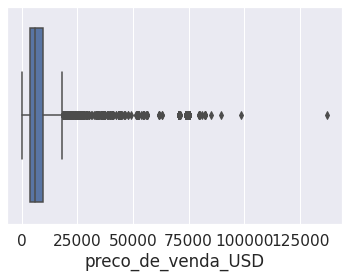

In [423]:
# Visualizando os dados através de boxplot

sns.boxplot(x=carros.preco_de_venda_USD)

####Conclusão prévia:

- Por meio desse gráfico é possível ver que há valores que se distanciam muito dos outros para essa variável. Esses valores podem ser considerados possivelmente outliers.

- Há funções matemáticas que nos permitem identificar precisamente tais outliers, tal como o Score Z e o "Interquartile range (IQR)".

- Como a proposta desse projeto_02 é demonstrar como fazemos uma análise de exploração de dados eu vou remover esses outliers a fim de demonstrar como realizamos tal tarefa. Irei fazer isso utilizando o Interquartile range (IQR).



In [424]:
for x in ['preco_de_venda_USD']:
    q75,q25 = np.percentile(carros.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    carros.loc[carros[x] < min,x] = np.nan
    carros.loc[carros[x] > max,x] = np.nan

In [427]:
# Identificando quantos valores nulos há no dataset por categoria

carros.isnull().sum()

nome_completo_do_carro                     0
ano                                        0
preco_de_venda_USD                         0
km_rodado                                  0
tipo_combustivel                           0
tipo_do_vendedor                           0
transmissao                                0
dono                                       0
consumo_do_combustivel_kmpl                0
motor_CC                                   0
potencia_do_motor_bhp                      0
assentos                                   0
preco_de_venda_USD_normalizado             0
consumo_do_combustivel_kmpl_normalizado    0
preco_de_venda_USD_binned                  0
tipo_de_combustivel_Diesel                 0
tipo_de_combustivel_Petrol                 0
dtype: int64

In [430]:
# Removendo as linhas que possuem valores nulos

carros = carros.dropna(axis = 0)

In [431]:
#Identificando se há valores nulos por categorias

carros.isnull().sum()

nome_completo_do_carro                     0
ano                                        0
preco_de_venda_USD                         0
km_rodado                                  0
tipo_combustivel                           0
tipo_do_vendedor                           0
transmissao                                0
dono                                       0
consumo_do_combustivel_kmpl                0
motor_CC                                   0
potencia_do_motor_bhp                      0
assentos                                   0
preco_de_venda_USD_normalizado             0
consumo_do_combustivel_kmpl_normalizado    0
preco_de_venda_USD_binned                  0
tipo_de_combustivel_Diesel                 0
tipo_de_combustivel_Petrol                 0
dtype: int64

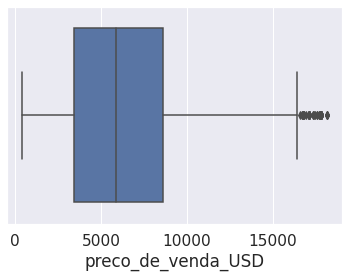

In [432]:
#Revendo se há valores discrepantes

sns.boxplot(x=carros.preco_de_venda_USD)

In [339]:
carros.shape

(7225, 17)

####Conclusão prévia:

- Foi possível destacar que houve uma acentuada diminuição de valores discrepantes para essa variável. Vou prosseguir para as outras variáveis a fim de realizar a detecção de outliers.

#### Variável nº 2 - "km_rodado"

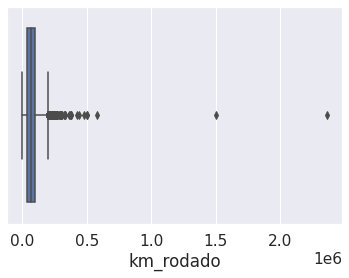

In [433]:
# Visualizando os dados através de boxplot

sns.boxplot(x=carros.km_rodado)

####Conclusão prévia:

- Por meio desse gráfico é possível ver que há valores que se distanciam muito dos outros para essa variável. Esses valores podem ser considerados possivelmente outliers.

- Vou identificar e remover esses outliers utilizando o Interquartile range (IQR).

In [434]:
for x in ['km_rodado']:
    q75,q25 = np.percentile(carros.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    carros.loc[carros[x] < min,x] = np.nan
    carros.loc[carros[x] > max,x] = np.nan

In [435]:
# Identificando quantos valores nulos há no dataset por categoria

carros.isnull().sum()

nome_completo_do_carro                       0
ano                                          0
preco_de_venda_USD                           0
km_rodado                                  155
tipo_combustivel                             0
tipo_do_vendedor                             0
transmissao                                  0
dono                                         0
consumo_do_combustivel_kmpl                  0
motor_CC                                     0
potencia_do_motor_bhp                        0
assentos                                     0
preco_de_venda_USD_normalizado               0
consumo_do_combustivel_kmpl_normalizado      0
preco_de_venda_USD_binned                    0
tipo_de_combustivel_Diesel                   0
tipo_de_combustivel_Petrol                   0
dtype: int64

In [436]:
# Removendo as linhas que possuem valores nulos

carros = carros.dropna(axis = 0)

In [437]:
#Identificando se há valores nulos por categorias

carros.isnull().sum()

nome_completo_do_carro                     0
ano                                        0
preco_de_venda_USD                         0
km_rodado                                  0
tipo_combustivel                           0
tipo_do_vendedor                           0
transmissao                                0
dono                                       0
consumo_do_combustivel_kmpl                0
motor_CC                                   0
potencia_do_motor_bhp                      0
assentos                                   0
preco_de_venda_USD_normalizado             0
consumo_do_combustivel_kmpl_normalizado    0
preco_de_venda_USD_binned                  0
tipo_de_combustivel_Diesel                 0
tipo_de_combustivel_Petrol                 0
dtype: int64

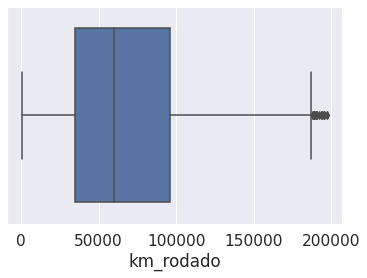

In [438]:
#Revendo se há valores discrepantes

sns.boxplot(x=carros.km_rodado)

In [345]:
carros.shape

(7070, 17)

####Conclusão prévia:

- Houve uma acentuada diminuição de valores discrepantes para essa variável. Vou prosseguir para as outras variáveis a fim de realizar a detecção de outliers.

#### Variável nº 3 - "consumo_do_combustivel_kmpl"

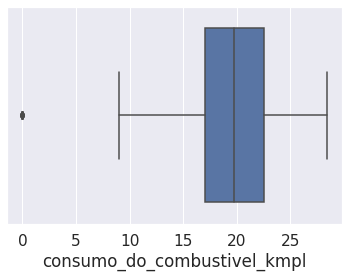

In [439]:
# Visualizando os dados através de boxplot

sns.boxplot(x=carros.consumo_do_combustivel_kmpl)

####Conclusão prévia:

- Por meio desse gráfico é possível ver que há valores que se distanciam muito dos outros para essa variável. Esses valores podem ser considerados possivelmente outliers.

- Vou identificar e remover esses outliers utilizando o Interquartile range (IQR).

In [440]:
for x in ['consumo_do_combustivel_kmpl']:
    q75,q25 = np.percentile(carros.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    carros.loc[carros[x] < min,x] = np.nan
    carros.loc[carros[x] > max,x] = np.nan

In [441]:
# Identificando quantos valores nulos há no dataset por categoria

carros.isnull().sum()

nome_completo_do_carro                      0
ano                                         0
preco_de_venda_USD                          0
km_rodado                                   0
tipo_combustivel                            0
tipo_do_vendedor                            0
transmissao                                 0
dono                                        0
consumo_do_combustivel_kmpl                13
motor_CC                                    0
potencia_do_motor_bhp                       0
assentos                                    0
preco_de_venda_USD_normalizado              0
consumo_do_combustivel_kmpl_normalizado     0
preco_de_venda_USD_binned                   0
tipo_de_combustivel_Diesel                  0
tipo_de_combustivel_Petrol                  0
dtype: int64

In [442]:
# Removendo as linhas que possuem valores nulos

carros = carros.dropna(axis = 0)

In [443]:
#Identificando se há valores nulos por categorias

carros.isnull().sum()

nome_completo_do_carro                     0
ano                                        0
preco_de_venda_USD                         0
km_rodado                                  0
tipo_combustivel                           0
tipo_do_vendedor                           0
transmissao                                0
dono                                       0
consumo_do_combustivel_kmpl                0
motor_CC                                   0
potencia_do_motor_bhp                      0
assentos                                   0
preco_de_venda_USD_normalizado             0
consumo_do_combustivel_kmpl_normalizado    0
preco_de_venda_USD_binned                  0
tipo_de_combustivel_Diesel                 0
tipo_de_combustivel_Petrol                 0
dtype: int64

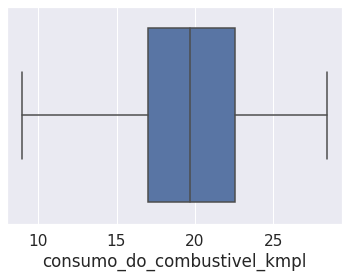

In [444]:
#Revendo se há valores discrepantes

sns.boxplot(x=carros.consumo_do_combustivel_kmpl)

In [351]:
carros.shape

(7057, 17)

####Conclusão prévia:

- Não há valores discrepantes para essa variável. Vou prosseguir para as outras variáveis a fim de realizar a detecção de outliers.

#### Variável nº 4 - "motor_CC" 

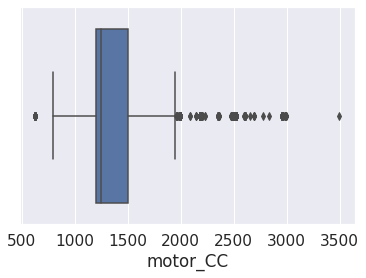

In [445]:
# Visualizando os dados através de boxplot

sns.boxplot(x=carros.motor_CC)

####Conclusão prévia:

- Por meio desse gráfico é possível ver que há valores que se distanciam muito dos outros para essa variável. Esses valores podem ser considerados possivelmente outliers.

- Vou identificar e remover esses outliers utilizando o Interquartile range (IQR).

In [446]:
for x in ['motor_CC']:
    q75,q25 = np.percentile(carros.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    carros.loc[carros[x] < min,x] = np.nan
    carros.loc[carros[x] > max,x] = np.nan

In [447]:
# Identificando quantos valores nulos há no dataset por categoria

carros.isnull().sum()

nome_completo_do_carro                       0
ano                                          0
preco_de_venda_USD                           0
km_rodado                                    0
tipo_combustivel                             0
tipo_do_vendedor                             0
transmissao                                  0
dono                                         0
consumo_do_combustivel_kmpl                  0
motor_CC                                   981
potencia_do_motor_bhp                        0
assentos                                     0
preco_de_venda_USD_normalizado               0
consumo_do_combustivel_kmpl_normalizado      0
preco_de_venda_USD_binned                    0
tipo_de_combustivel_Diesel                   0
tipo_de_combustivel_Petrol                   0
dtype: int64

In [448]:
# Removendo as linhas que possuem valores nulos

carros = carros.dropna(axis = 0)

In [449]:
#Identificando se há valores nulos por categorias

carros.isnull().sum()

nome_completo_do_carro                     0
ano                                        0
preco_de_venda_USD                         0
km_rodado                                  0
tipo_combustivel                           0
tipo_do_vendedor                           0
transmissao                                0
dono                                       0
consumo_do_combustivel_kmpl                0
motor_CC                                   0
potencia_do_motor_bhp                      0
assentos                                   0
preco_de_venda_USD_normalizado             0
consumo_do_combustivel_kmpl_normalizado    0
preco_de_venda_USD_binned                  0
tipo_de_combustivel_Diesel                 0
tipo_de_combustivel_Petrol                 0
dtype: int64

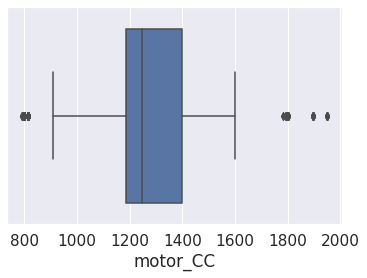

In [450]:
#Revendo se há valores discrepantes

sns.boxplot(x=carros.motor_CC)

In [357]:
carros.shape

(6076, 17)

####Conclusão prévia:

- Houve uma acentuada diminuição de valores discrepantes para essa variável. Vou prosseguir para as outras variáveis a fim de realizar a detecção de outliers.

#### Variável nº 5 - "potencia_do_motor_bhp"

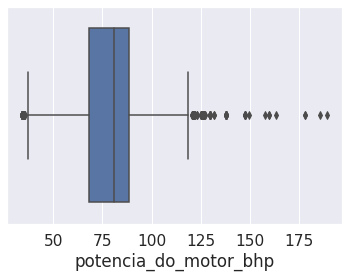

In [451]:
# Visualizando os dados através de boxplot

sns.boxplot(x=carros.potencia_do_motor_bhp)

####Conclusão prévia:

- Por meio desse gráfico é possível ver que há valores que se distanciam muito dos outros para essa variável. Esses valores podem ser considerados possivelmente outliers.

- Vou identificar e remover esses outliers utilizando o Interquartile range (IQR).

In [452]:
for x in ['potencia_do_motor_bhp']:
    q75,q25 = np.percentile(carros.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    carros.loc[carros[x] < min,x] = np.nan
    carros.loc[carros[x] > max,x] = np.nan

In [453]:
# Identificando quantos valores nulos há no dataset por categoria

carros.isnull().sum()

nome_completo_do_carro                       0
ano                                          0
preco_de_venda_USD                           0
km_rodado                                    0
tipo_combustivel                             0
tipo_do_vendedor                             0
transmissao                                  0
dono                                         0
consumo_do_combustivel_kmpl                  0
motor_CC                                     0
potencia_do_motor_bhp                      303
assentos                                     0
preco_de_venda_USD_normalizado               0
consumo_do_combustivel_kmpl_normalizado      0
preco_de_venda_USD_binned                    0
tipo_de_combustivel_Diesel                   0
tipo_de_combustivel_Petrol                   0
dtype: int64

In [454]:
# Removendo as linhas que possuem valores nulos

carros = carros.dropna(axis = 0)

In [455]:
#Identificando se há valores nulos por categorias

carros.isnull().sum()

nome_completo_do_carro                     0
ano                                        0
preco_de_venda_USD                         0
km_rodado                                  0
tipo_combustivel                           0
tipo_do_vendedor                           0
transmissao                                0
dono                                       0
consumo_do_combustivel_kmpl                0
motor_CC                                   0
potencia_do_motor_bhp                      0
assentos                                   0
preco_de_venda_USD_normalizado             0
consumo_do_combustivel_kmpl_normalizado    0
preco_de_venda_USD_binned                  0
tipo_de_combustivel_Diesel                 0
tipo_de_combustivel_Petrol                 0
dtype: int64

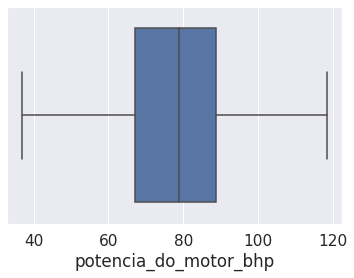

In [456]:
#Revendo se há valores discrepantes

sns.boxplot(x=carros.potencia_do_motor_bhp)

In [363]:
carros.shape

(5773, 17)

####Conclusão prévia:

- Não há valores discrepantes para essa variável. Vou prosseguir para as outras variáveis a fim de realizar a detecção de outliers.

#### Variável nº 6 - "assentos"

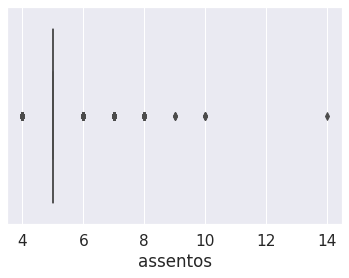

In [457]:
# Visualizando os dados através de boxplot

sns.boxplot(x=carros.assentos)

####Conclusão prévia:

- Por meio desse gráfico é possível ver que há valores que se distanciam muito dos outros para essa variável. Esses valores podem ser considerados possivelmente outliers.

- Vou identificar e remover esses outliers utilizando o Interquartile range (IQR).

In [461]:
for x in ['assentos']:
    q75,q25 = np.percentile(carros.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    carros.loc[carros[x] < min,x] = np.nan
    carros.loc[carros[x] > max,x] = np.nan

In [462]:
# Identificando quantos valores nulos há no dataset por categoria

carros.isnull().sum()

nome_completo_do_carro                       0
ano                                          0
preco_de_venda_USD                           0
km_rodado                                    0
tipo_combustivel                             0
tipo_do_vendedor                             0
transmissao                                  0
dono                                         0
consumo_do_combustivel_kmpl                  0
motor_CC                                     0
potencia_do_motor_bhp                        0
assentos                                   491
preco_de_venda_USD_normalizado               0
consumo_do_combustivel_kmpl_normalizado      0
preco_de_venda_USD_binned                    0
tipo_de_combustivel_Diesel                   0
tipo_de_combustivel_Petrol                   0
dtype: int64

In [463]:
# Removendo as linhas que possuem valores nulos

carros = carros.dropna(axis = 0)

In [464]:
#Identificando se há valores nulos por categorias

carros.isnull().sum()

nome_completo_do_carro                     0
ano                                        0
preco_de_venda_USD                         0
km_rodado                                  0
tipo_combustivel                           0
tipo_do_vendedor                           0
transmissao                                0
dono                                       0
consumo_do_combustivel_kmpl                0
motor_CC                                   0
potencia_do_motor_bhp                      0
assentos                                   0
preco_de_venda_USD_normalizado             0
consumo_do_combustivel_kmpl_normalizado    0
preco_de_venda_USD_binned                  0
tipo_de_combustivel_Diesel                 0
tipo_de_combustivel_Petrol                 0
dtype: int64

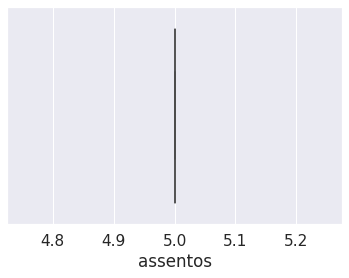

In [465]:
#Revendo se há valores discrepantes

sns.boxplot(x=carros.assentos)

In [369]:
carros.shape

(5282, 17)

####Conclusão prévia:

- Não há valores discrepantes para essa variável. Vou prosseguir para as outras variáveis a fim de realizar a detecção de outliers.

# 2 - Análises exploratórias para as variáveis categóricas

### 1 - Variável "tipo_combustivel"

Criando um dataframe para a variável e identificando a quantidade de valores por meio da função "value_counts()"

In [489]:
carros.tipo_combustivel.value_counts().to_frame()

,tipo_combustivel
Petrol,2989
Diesel,2293


In [490]:
#Vou criar um índice a fim de criar duas colunas nesse dataframe.

carros.tipo_combustivel.value_counts().to_frame().reset_index()

,index,tipo_combustivel
0,Petrol,2989
1,Diesel,2293


In [491]:
#Vou renomear esse produto

tipo_combustivel = carros.tipo_combustivel.value_counts().to_frame().reset_index()

In [492]:
tipo_combustivel.head()

,index,tipo_combustivel
0,Petrol,2989
1,Diesel,2293


In [493]:
#Vou trocar os rótulos de cada coluna

tipo_combustivel.columns = ['Tipo_combustivel', 'Quantidade_de_carros']

In [494]:
#Checando os valores por categoria

tipo_combustivel

,Tipo_combustivel,Quantidade_de_carros
0,Petrol,2989
1,Diesel,2293


Gráfico

In [495]:
#Agora sim vou criar um gráfico para essa variável

#Vou utilizar um gráfico de barras da biblioteca Seaborn

import seaborn as sns

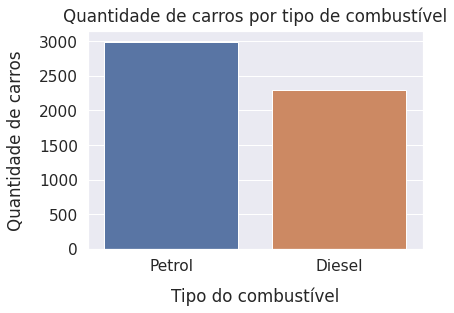

In [496]:
#Vou mencionar ao seaborn quais sãos os parâmetros do eixo x e do eixo y

sns.set(font_scale=1.4)

sns.barplot(x = "Tipo_combustivel", y = "Quantidade_de_carros", data = tipo_combustivel)

plt.xlabel("Tipo do combustível", labelpad=14)
plt.ylabel("Quantidade de carros", labelpad=14)
plt.title("Quantidade de carros por tipo de combustível", y=1.02);

#Conclusão prévia:

- Há mais carros para o tipo de combustível "Diesel" do que "Petrol"

## 2 - Variável "tipo_do_vendedor"

Criando um dataframe para a variável e identificando a quantidade de valores por meio da função "value_counts()"

In [497]:
#Vou criar um índice a fim de criar duas colunas nesse dataframe.

carros.tipo_do_vendedor.value_counts().to_frame().reset_index()

,index,tipo_do_vendedor
0,Individual,4484
1,Dealer,626
2,Trustmark Dealer,172


In [498]:
#Vou renomear esse produto

tipo_do_vendedor = carros.tipo_do_vendedor.value_counts().to_frame().reset_index()

In [499]:
tipo_do_vendedor.head()

,index,tipo_do_vendedor
0,Individual,4484
1,Dealer,626
2,Trustmark Dealer,172


In [500]:
#Vou trocar os rótulos de cada coluna

tipo_do_vendedor.columns = ['tipo_do_vendedor', "Quantidade_de_carros"]

In [501]:
#Checando os valores por categoria

tipo_do_vendedor

,tipo_do_vendedor,Quantidade_de_carros
0,Individual,4484
1,Dealer,626
2,Trustmark Dealer,172


Gráfico

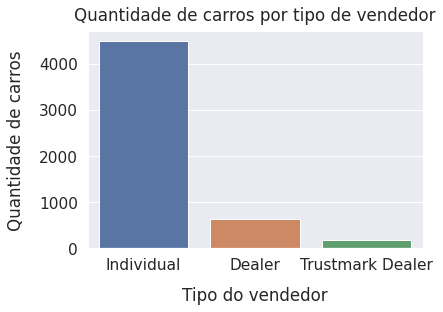

In [502]:
#Vou mencionar ao seaborn quais sãos os parâmetros do eixo x e do eixo y

sns.set(font_scale=1.4)

sns.barplot(x = "tipo_do_vendedor", y = "Quantidade_de_carros", data = tipo_do_vendedor)

plt.xlabel("Tipo do vendedor", labelpad=14)
plt.ylabel("Quantidade de carros", labelpad=14)
plt.title("Quantidade de carros por tipo de vendedor", y=1.02);

# Conclusão prévia:

- Há mais carros para vendedores do tipo individual, seguido de "Dealer" e "Trustmark Dealer"

## 3 - Variável "transmissao"

Criando um dataframe para a variável e identificando a quantidade de valores por meio da função "value_counts()"

In [503]:
carros.transmissao.value_counts().to_frame()

,transmissao
Manual,4881
Automatic,401


In [504]:
#Vou criar um índice a fim de criar duas colunas nesse dataframe.

carros.transmissao.value_counts().to_frame().reset_index()

,index,transmissao
0,Manual,4881
1,Automatic,401


In [505]:
#Vou renomear esse produto

transmissao = carros.transmissao.value_counts().to_frame().reset_index()

In [506]:
transmissao.head()

,index,transmissao
0,Manual,4881
1,Automatic,401


In [507]:
#Vou trocar os rótulos de cada coluna

transmissao.columns = ['Tipo_de_transmissao', 'Quantidade_de_carros']

In [508]:
#Checando os valores por categoria

transmissao

,Tipo_de_transmissao,Quantidade_de_carros
0,Manual,4881
1,Automatic,401


Gráfico

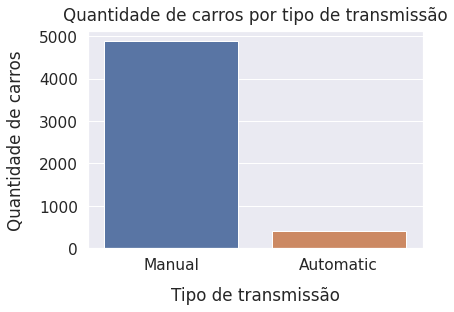

In [509]:
#Vou mencionar ao seaborn quais sãos os parâmetros do eixo x e do eixo y

sns.set(font_scale=1.4)

sns.barplot(x = "Tipo_de_transmissao", y = "Quantidade_de_carros", data = transmissao)

plt.xlabel("Tipo de transmissão", labelpad=14)
plt.ylabel("Quantidade de carros", labelpad=14)
plt.title("Quantidade de carros por tipo de transmissão", y=1.02);

#Conclusão prévia:

- Há mais de vezes carros com tipo de transmissão "Manual" do que "Automatic".

## 4 - Variável "dono"

Criando um dataframe para a variável e identificando a quantidade de valores por meio da função "value_counts()"

In [510]:
#Vou criar um índice a fim de criar duas colunas nesse dataframe.

carros.dono.value_counts().to_frame().reset_index()

,index,dono
0,First Owner,3520
1,Second Owner,1316
2,Third Owner,344
3,Fourth & Above Owner,102


In [511]:
#Vou renomear esse produto

dono = carros.dono.value_counts().to_frame().reset_index()

In [512]:
dono.head()

,index,dono
0,First Owner,3520
1,Second Owner,1316
2,Third Owner,344
3,Fourth & Above Owner,102


In [513]:
#Vou trocar os rótulos de cada coluna

dono.columns = ['Tipo_do_dono', 'Quantidade_de_carros']

In [514]:
#Checando os valores por categoria

dono

,Tipo_do_dono,Quantidade_de_carros
0,First Owner,3520
1,Second Owner,1316
2,Third Owner,344
3,Fourth & Above Owner,102


Gráfico

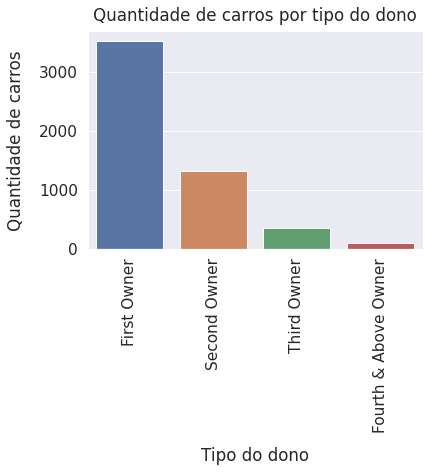

In [515]:
#Vou mencionar ao seaborn quais sãos os parâmetros do eixo x e do eixo y

sns.set(font_scale=1.4)

sns.barplot(x = "Tipo_do_dono", y = "Quantidade_de_carros", data = dono)

plt.xticks(rotation=90) #Girar em 80 graus o rótulo de x

plt.xlabel("Tipo do dono", labelpad=14)
plt.ylabel("Quantidade de carros", labelpad=14)
plt.title("Quantidade de carros por tipo do dono", y=1.02);

#Conclusão prévia:

- Há uma nítida queda na quantidade de carros a medida que aumenta a quantidade de donos para o respectivo carro.

#_____________________________________
#_____________________________________
#_____________________________________
#_____________________________________

####Através de todas essas análises exploratórias e partindo da premissa de que o valor de venda do carro é relacionado aos seus atributos (hipótese central do estudo), eu posso explorar as seguintes perguntas:




1 - O valor do carro está relacionado km rodado?

2 - o valor do carro pode estar relacionado ao consumo de combustível?

3 - o valor do carro pode estar relacionado as cilindradas do motor?

4 - o valor do carro pode estar relacionado a potencia do motor?

5 - o valor do carro pode estar relacionado a quantidade de assentos?

####Para começar a investigar essas perguntas podemos utilizar o "Scatterplot"

# # 1 - Preço de venda (y)    por  km_rodado (x) 

Text(0, 0.5, 'Preço de venda (USD)')

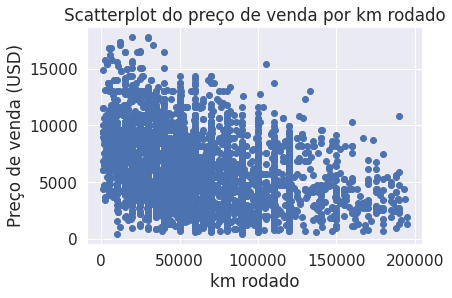

In [517]:
#Scatterplot

#Preço de venda (y)    por  km_rodado (x) 

y=carros.preco_de_venda_USD

x=carros.km_rodado

plt.scatter(x,y)

plt.title("Scatterplot do preço de venda por km rodado")

plt.xlabel("km rodado")

plt.ylabel("Preço de venda (USD)")

# Conclusão prévia:

- A medida que aumenta o km rodado há uma possível tendência de queda no preço de venda do veículo. 

# 2 - Preço de venda (y)    por  consumo_do_combustivel_kmpl (x) 

Text(0, 0.5, 'Preço de venda (USD)')

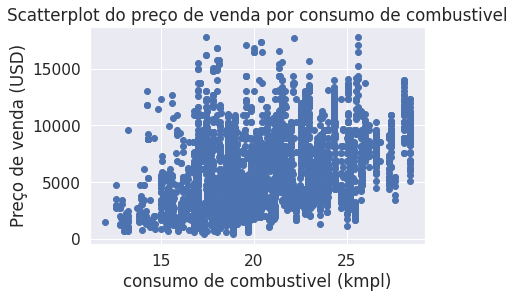

In [518]:
#Scatterplot

#Preço de venda (y)    por  consumo_do_combustivel_kmpl (x) 

y=carros.preco_de_venda_USD

x=carros.consumo_do_combustivel_kmpl

plt.scatter(x,y)

plt.title("Scatterplot do preço de venda por consumo de combustivel")

plt.xlabel("consumo de combustivel (kmpl)")

plt.ylabel("Preço de venda (USD)")

#Conclusão prévia:

- Há uma tendência de subida de preço de venda do veículo em níveis intermediários de consumo do combistível, e respectiva queda de preço em valores extremos de consumo de combustível.

# 3 - Preço de venda (y)    por  motor_CC (x) 

Text(0, 0.5, 'Preço de venda (USD)')

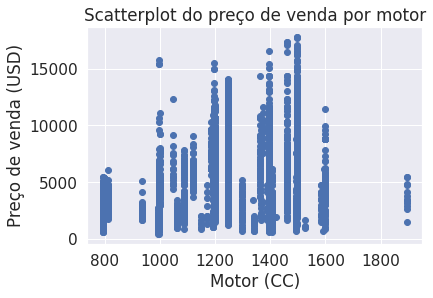

In [519]:
#Scatterplot

#Preço de venda (y)    por  motor_CC (x) 

y=carros.preco_de_venda_USD

x=carros.motor_CC

plt.scatter(x,y)

plt.title("Scatterplot do preço de venda por motor")

plt.xlabel("Motor (CC)")

plt.ylabel("Preço de venda (USD)")

#Conclusão prévia:

- Há uma possível tendência de aumento do valor do preço em níveis intermediários de cilindradas do motor, com respectiva queda em valores extremos de cilindradas.

# 4 - Preço de venda (y)    potencia_do_motor_bhp (x)

Text(0, 0.5, 'Preço de venda (USD)')

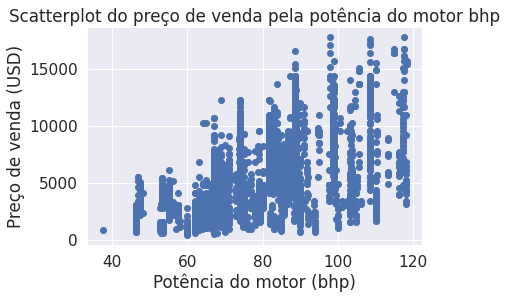

In [521]:
#Scatterplot

#Preço de venda (y)    potencia_do_motor_bhp (x) 

y=carros.preco_de_venda_USD

x=carros.potencia_do_motor_bhp

plt.scatter(x,y)

plt.title("Scatterplot do preço de venda pela potência do motor bhp")

plt.xlabel("Potência do motor (bhp)")

plt.ylabel("Preço de venda (USD)")

#Conclusão prévia:

- Há uma possibilidade de tendência de aumento no valor do veículo a medida que aumenta a potência do motor. 

# 5 - Preço de venda (y)    assentos (x)

Text(0, 0.5, 'Preço de venda do veículo (USD)')

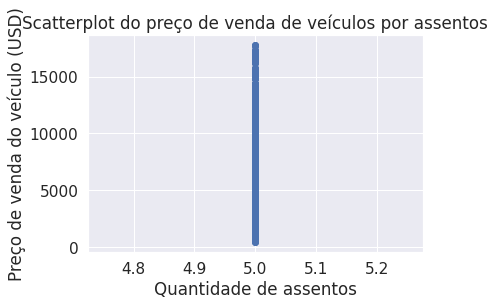

In [522]:
#Scatterplot

#Preço de venda (y)    assentos (x) 

y=carros.preco_de_venda_USD

x=carros.assentos

plt.scatter(x,y)

plt.title("Scatterplot do preço de venda de veículos por assentos")

plt.xlabel("Quantidade de assentos")

plt.ylabel("Preço de venda do veículo (USD)")

#Conclusão prévia:

- Todos os veículos aqui possuem o mesmo número de assentos. Assim, não é possível com esses dados inferir se há ou não influência da quantidade de assentos no preço de venda dos veículos.

#_____________________________________
#_____________________________________
#_____________________________________
#_____________________________________

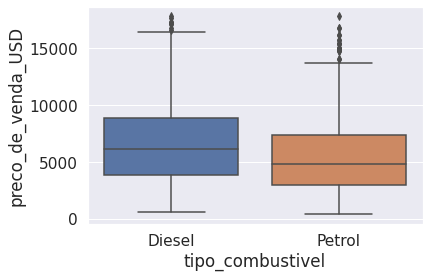

In [525]:
#Boxplot de preço de venda por tipo de combustível 

sns.boxplot(x = "tipo_combustivel", y = "preco_de_venda_USD", data=carros)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

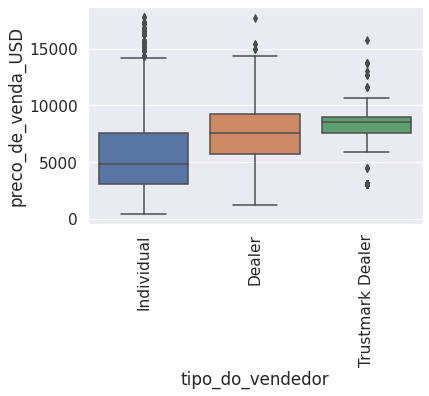

In [535]:
# tipo_do_vendedor

#Boxplot de preço de venda por tipo_do_vendedor

sns.boxplot(x = "tipo_do_vendedor", y = "preco_de_venda_USD", data=carros)

plt.xticks(rotation=90) #Girar em 80 graus o rótulo de x

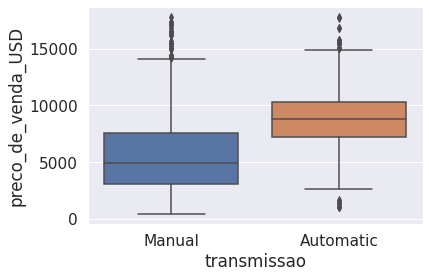

In [527]:
# transmissao 

#Boxplot de preço de venda por transmissao 

sns.boxplot(x = "transmissao", y = "preco_de_venda_USD", data=carros)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

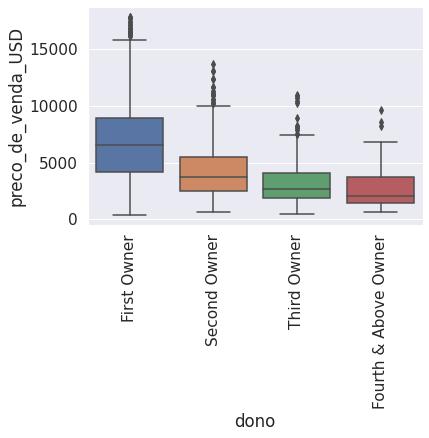

In [534]:
# dono 

# Boxplot de preço de venda por dono 

sns.boxplot(x = "dono", y = "preco_de_venda_USD", data=carros)

plt.xticks(rotation=90) #Girar em 80 graus o rótulo de x

# Groupby()

In [529]:
carros_teste = carros[["transmissao", "dono", "preco_de_venda_USD"]]

carros_grp = carros_teste.groupby(["transmissao", "dono"], as_index=False).mean()

carros_grp

,transmissao,dono,preco_de_venda_USD
0,Automatic,First Owner,9088.172719
1,Automatic,Fourth & Above Owner,4458.904110
2,Automatic,Second Owner,5805.478669
3,Automatic,Third Owner,3436.397260
4,Manual,First Owner,6478.940908
5,Manual,Fourth & Above Owner,2693.667179
6,Manual,Second Owner,4108.404703
7,Manual,Third Owner,3139.994919


# Pandas method - Pivot()

In [530]:
carros_pivot = carros_grp.pivot(index = "transmissao", columns = "dono")

carros_pivot

preco_de_venda_USD                                               
dono               First Owner Fourth & Above Owner Second Owner  Third Owner
transmissao                                                                  
Automatic          9088.172719          4458.904110  5805.478669  3436.397260
Manual             6478.940908          2693.667179  4108.404703  3139.994919

# Heatmap

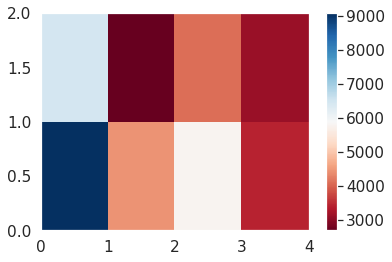

In [531]:
plt.pcolor(carros_pivot, cmap="RdBu")

plt.colorbar()

plt.show()

# ANOVA

In [532]:
# Preço de venda por tipo de combustível 

import scipy.stats as stats

carros_anova = carros[["tipo_combustivel", "preco_de_venda_USD"]]
                      
grouped_anova = carros_anova.groupby(["tipo_combustivel"])

grouped_anova                      


In [533]:
anova_results_1 = stats.f_oneway(grouped_anova.get_group("Diesel") ["preco_de_venda_USD"]), (grouped_anova.get_group("Petrol") ["preco_de_venda_USD"])

anova_results_1

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3347: RuntimeWarning: invalid value encountered in double_scalars
  msb = ssbn / dfbn


(F_onewayResult(statistic=nan, pvalue=nan), 2       2164.383562
 4       1780.821918
 5       6027.397260
 10      1260.273973
 12      2465.753425
            ...     
 7809    5205.479452
 7810    4931.506849
 7811    1643.835616
 7812    3561.643836
 7814    4383.561644
 Name: preco_de_venda_USD, Length: 2989, dtype: float64)

#Autor:


### - Lucas Andrei Campos-Silva

- link para meu portifólio de projetos em Data Science: https://github.com/Campos-Silva 
- e-mail para contato: andrei.10@hotmail.com
- linkedIn: https://www.linkedin.com/in/lucas-andrei-campos-silva/


